# Lab 1 Report: 
## Data Preparation Techniques for Machine Learning and Regression

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [3]:
Image('lab1_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab1_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab1_exercise1.PNG'

<IPython.core.display.Image object>

In [4]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)

,Unnamed: 0,x,y,z,eta,phi,energy,trackId
0,0,179.50383,-23.632137,-7.878280,-0.0435,-0.130900,0.200126,462412
1,1,-143.63881,110.217940,-72.706795,-0.3915,2.487094,2.734594,493395
2,2,179.50383,-23.632120,-146.429610,-0.7395,-0.130900,0.423910,1
3,3,-172.67310,54.443620,-238.065340,-1.0875,2.836160,0.713950,493640
4,4,-180.88046,7.897389,-238.065340,-1.0875,3.097959,0.000000,495225
5,5,-180.88045,-7.897438,-238.065340,-1.0875,-3.097959,0.034491,495225
6,6,-152.69838,-97.279590,-265.020540,-1.1745,-2.574361,0.580138,460126
7,7,-23.63213,179.503810,-325.172060,-1.3485,1.701696,0.411487,465028
8,8,-152.69835,97.279594,89.977780,0.4785,2.574361,0.183141,1383
9,9,-176.76110,39.187016,107.930240,0.5655,2.923426,0.337551,4421


In [5]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [6]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub. 
# The array should have dimension 420 (rows) x 6 (columns)

# Extract columns 1-6 (x, y, z, eta, phi, energy) from the numpy array
# Note: column 0 is the index, columns 1-6 are x, y, z, eta, phi, energy
CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7]

print("Shape of extracted data:", CMS_calori_dataset_np_sub.shape)
print("First 5 rows of extracted data:")
print(CMS_calori_dataset_np_sub[:5])

Shape of extracted data: (420, 6)
First 5 rows of extracted data:
[[ 1.7950383e+02 -2.3632137e+01 -7.8782797e+00 -4.3500002e-02
  -1.3089974e-01  2.0012644e-01]
 [-1.4363881e+02  1.1021794e+02 -7.2706795e+01 -3.9149997e-01
   2.4870942e+00  2.7345939e+00]
 [ 1.7950383e+02 -2.3632120e+01 -1.4642961e+02 -7.3950000e-01
  -1.3089965e-01  4.2390990e-01]
 [-1.7267310e+02  5.4443620e+01 -2.3806534e+02 -1.0875000e+00
   2.8361600e+00  7.1395034e-01]
 [-1.8088046e+02  7.8973890e+00 -2.3806534e+02 -1.0874999e+00
   3.0979595e+00  0.0000000e+00]]


In [7]:
# Create the scaling function

def scale_data(arr):
    """
    Scale data using standardization (z-score normalization)
    Formula: (x - mean) / std
    """
    # Calculate mean and standard deviation along axis 0 (columns)
    mean_vals = np.mean(arr, axis=0)
    std_vals = np.std(arr, axis=0)
    
    # Avoid division by zero by adding small epsilon
    epsilon = 1e-8
    std_vals = np.where(std_vals == 0, epsilon, std_vals)
    
    # Apply standardization
    scaled_data = (arr - mean_vals) / std_vals
    
    return scaled_data

In [8]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

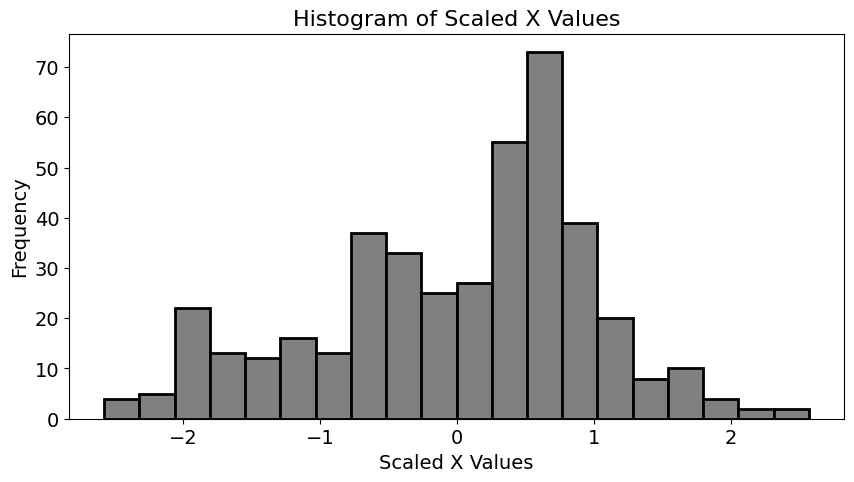

In [9]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 
plt.xlabel('Scaled X Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Scaled X Values', fontsize=16)

plt.show()

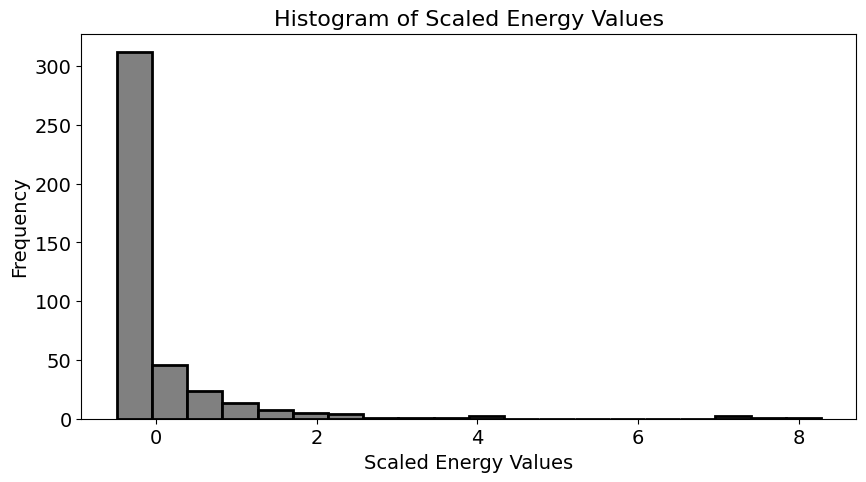

In [10]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 
plt.xlabel('Scaled Energy Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Scaled Energy Values', fontsize=16)

plt.show()

### Expected histogram outputs - Feel free to style your plot differently

In [11]:
Image('lab1_e1_expected_outputs.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab1_e1_expected_outputs.PNG'

FileNotFoundError: No such file or directory: 'lab1_e1_expected_outputs.PNG'

<IPython.core.display.Image object>

---

In [12]:
Image('lab1_exercise2.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab1_exercise2.PNG'

FileNotFoundError: No such file or directory: 'lab1_exercise2.PNG'

<IPython.core.display.Image object>

In [13]:
# Create the splitting function

def split_data(arr, split_proportions, axis):
    """
    Split data along specified axis according to given proportions
    
    Parameters:
    arr: numpy array to split
    split_proportions: list of proportions (should sum to 1.0)
    axis: axis along which to split (0 for rows, 1 for columns)
    
    Returns:
    list of numpy sub-arrays according to split proportions
    """
    # Validate that proportions sum to 1.0
    if abs(sum(split_proportions) - 1.0) > 1e-6:
        raise ValueError("Split proportions must sum to 1.0")
    
    # Get the size along the specified axis
    total_size = arr.shape[axis]
    
    # Calculate split indices
    split_indices = []
    cumulative_size = 0
    
    for i, proportion in enumerate(split_proportions):
        if i == len(split_proportions) - 1:
            # Last split gets all remaining data
            split_indices.append(total_size)
        else:
            cumulative_size += int(proportion * total_size)
            split_indices.append(cumulative_size)
    
    # Split the array
    split_data_list = []
    start_idx = 0
    
    for end_idx in split_indices:
        if axis == 0:
            # Split along rows
            split_data_list.append(arr[start_idx:end_idx, :])
        else:
            # Split along columns
            split_data_list.append(arr[:, start_idx:end_idx])
        start_idx = end_idx
    
    return split_data_list

In [14]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                    split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [15]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [16]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                                split_proportions = [0.5, 0.5], axis = 1)

In [17]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)


---

In [18]:
Image('lab1_exercise3.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab1_exercise3.PNG'

FileNotFoundError: No such file or directory: 'lab1_exercise3.PNG'

<IPython.core.display.Image object>

In [19]:
# Split data into 80% train and 20% test

# Split the scaled data into train and test sets
# Features are columns 0-5 (x, y, z, eta, phi), target is column 5 (energy)
X = CMS_calori_dataset_np_sub_scaled[:, 0:5]  # Features: x, y, z, eta, phi
y = CMS_calori_dataset_np_sub_scaled[:, 5]    # Target: energy

# Use our split function to split into 80% train and 20% test
train_test_split = split_data(X, [0.8, 0.2], axis=0)
X_train = train_test_split[0]
X_test = train_test_split[1]

# Also split the target variable
y_train_test_split = split_data(y.reshape(-1, 1), [0.8, 0.2], axis=0)
y_train = y_train_test_split[0].flatten()
y_test = y_train_test_split[1].flatten()

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (336, 5)
y_train: (336,)

Test set shapes:
X_test: (84, 5)
y_test: (84,)


In [20]:
# Implement ridge regression function

def ridge_regression(X_train, y_train, X_test, alpha):
    """
    Implement Ridge Regression using the closed-form solution
    
    Parameters:
    X_train: training features (n_samples, n_features)
    y_train: training targets (n_samples,)
    X_test: test features (n_test_samples, n_features)
    alpha: regularization parameter
    
    Returns:
    y_pred: predicted values for test set
    """
    # Add bias term (intercept) to features
    X_train_with_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])
    X_test_with_bias = np.column_stack([np.ones(X_test.shape[0]), X_test])
    
    # Ridge regression closed-form solution
    # w = (X^T * X + alpha * I)^(-1) * X^T * y
    n_features = X_train_with_bias.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0  # Don't regularize the bias term
    
    # Calculate weights
    XTX = X_train_with_bias.T @ X_train_with_bias
    XTy = X_train_with_bias.T @ y_train
    w = np.linalg.inv(XTX + alpha * I) @ XTy
    
    # Make predictions
    y_pred = X_test_with_bias @ w
    
    return y_pred

In [21]:
# Produce prediction for test data with alpha = 1

y_pred = ridge_regression(X_train, y_train, X_test, alpha = 1)

In [22]:
# Re-scale the ground-truth and predicted energy values to original scale

# Get the original mean and std for energy column (column 5 in the original data)
original_energy_mean = np.mean(CMS_calori_dataset_np_sub[:, 5])
original_energy_std = np.std(CMS_calori_dataset_np_sub[:, 5])

# Re-scale the ground truth and predictions back to original scale
y_test_original = y_test * original_energy_std + original_energy_mean
y_pred_original = y_pred * original_energy_std + original_energy_mean

print("Original scale statistics:")
print(f"Original energy mean: {original_energy_mean:.4f}")
print(f"Original energy std: {original_energy_std:.4f}")
print(f"\nScaled test energy mean: {np.mean(y_test):.4f}")
print(f"Scaled test energy std: {np.std(y_test):.4f}")
print(f"\nRe-scaled test energy mean: {np.mean(y_test_original):.4f}")
print(f"Re-scaled test energy std: {np.std(y_test_original):.4f}")

Original scale statistics:
Original energy mean: 0.9041
Original energy std: 1.8328

Scaled test energy mean: -0.0075
Scaled test energy std: 0.9486

Re-scaled test energy mean: 0.8903
Re-scaled test energy std: 1.7385


In [23]:
# Print RMSE error between ground-truth and predictions

# Calculate RMSE (Root Mean Square Error)
mse = np.mean((y_test_original - y_pred_original) ** 2)
rmse = np.sqrt(mse)

# Also calculate MAE (Mean Absolute Error) for additional insight
mae = np.mean(np.abs(y_test_original - y_pred_original))

print(f"RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R² Score: {1 - np.sum((y_test_original - y_pred_original) ** 2) / np.sum((y_test_original - np.mean(y_test_original)) ** 2):.4f}")

RMSE (Root Mean Square Error): 1.6983
MAE (Mean Absolute Error): 0.9740
R² Score: 0.0458


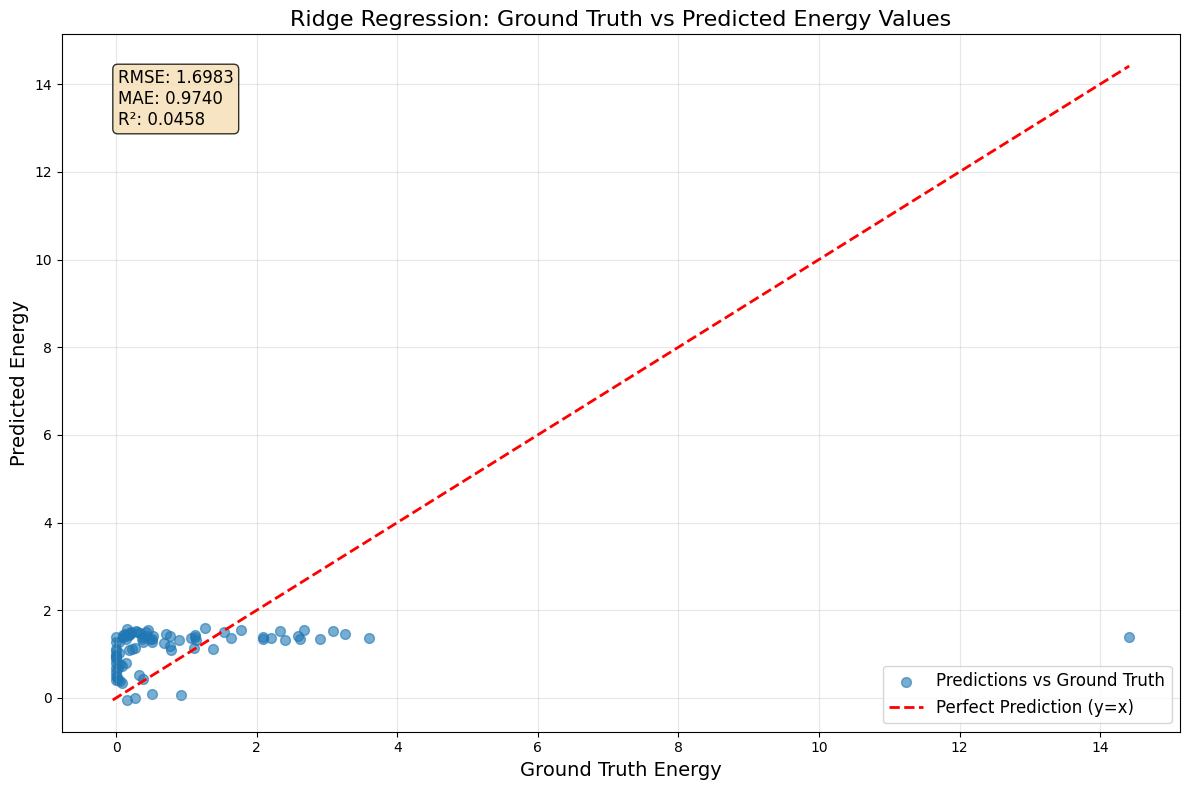

In [24]:
# Plot ground-truth and predicted energy values overlaid on top on each other in a single plot

plt.figure(figsize=(12, 8))

# Create scatter plot of ground truth vs predictions
plt.scatter(y_test_original, y_pred_original, alpha=0.6, s=50, label='Predictions vs Ground Truth')

# Add perfect prediction line (y=x)
min_val = min(np.min(y_test_original), np.min(y_pred_original))
max_val = max(np.max(y_test_original), np.max(y_pred_original))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction (y=x)')

# Add labels and title
plt.xlabel('Ground Truth Energy', fontsize=14)
plt.ylabel('Predicted Energy', fontsize=14)
plt.title('Ridge Regression: Ground Truth vs Predicted Energy Values', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add text box with performance metrics
textstr = f'RMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR²: {1 - np.sum((y_test_original - y_pred_original) ** 2) / np.sum((y_test_original - np.mean(y_test_original)) ** 2):.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()